In [1]:
from datetime import timedelta
from SPICE.ephemeris import ephemeris
import spiceypy as sp
from datetime import datetime
from gravsystem import gravsystem
import vpython as vp
from config.parse_config import parse_config

def timeflow(real_duration, animation_duration, frame_rate):
    total_frames = animation_duration * frame_rate
    real_frame_period = real_duration / total_frames
    for _ in range(total_frames):
        vp.rate(frame_rate)
        ss.draw()
        ss.update(real_frame_period)
        
class dotdict(dict):
    """modified from https://stackoverflow.com/questions/2352181"""
    """dot.notation access to dictionary attributes"""
    def __getattr__(*args): 
        val = dict.get(*args)
        return dotdict(val) if type(val) is dict else val
  
    def __getitem__(*args):
        val = dict.get(*args)
        return dotdict(val) if type(val) is dict else val
        
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__


config = parse_config('C:/Users/HP/GravAssist/src/config/config_experiment.json')
now = datetime.today()
ephemeris = ephemeris(sp, config)
ss = gravsystem(config, ephemeris, now)
scene = vp.canvas(title='3D scene')
timeflow(timedelta(days=0), 1, 10)

#from passive_body import passive_body          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
timeflow(timedelta(days=150), 5, 100)

In [2]:
import numpy as np
from numpy.linalg import norm as norm
from vpython import vector as V
from numpy import array as arr
from lambert import lambert_transfer

scale = 1e-6
def draw_solution(aE, bE, dt, f2, v1, v2, Rinv):
    vp.sphere(pos=V(*(p2*scale)), radius=5, color=vp.color.purple)
    vp.arrow(pos=V(*(p1*scale)), axis=V(*(v1)), color=V(1,0,0), radius=3, shaftwidth=0.2)
    vp.arrow(pos=V(*(p2*scale)), axis=V(*(v2)), color=V(0,0,1), radius=3, shaftwidth=0.2)
    vp.sphere(pos=V(*(f2*scale)), radius=1, color=vp.color.orange)
    circ = vp.shapes.circle(pos=(0,0), radius=0.2)
    path = vp.paths.ellipse(pos=V(*(f2/2*scale)), 
                             width=aE*scale, height=bE*scale)
    orbit = vp.extrusion(path=path, shape=circ, axis=V(*f2))   
    up = Rinv(arr([0,0,1]))
    orbit.up = V(*up)

T = timedelta(days=30)
GM = ss.body_list['SUN'].const('GM', 1)
p1 = ss.body_list['MERCURY'].state(ss.time)[:3]
p2 = ss.body_list['VENUS'].state(ss.time+T)[:3]
solutions = lambert_transfer(p1, p2, ss.time, T, GM)
for solution in solutions: draw_solution(**solution)



In [9]:
#---------------------------------------------------------------------------
'''vp.arrow(axis=V(*(r1E*10)), color=V(1,0.8,0.8), shaftwidth=0.1)
vp.arrow(axis=V(*(r2E*10)), color=V(0.8,0.8,1), shaftwidth=0.1)
vp.arrow(pos=V(*(r1E*10)), axis=V(*(v1E*10)), color=V(1,0.8,0.8), shaftwidth=0.2)
vp.arrow(pos=V(*(r2E*10)), axis=V(*(v2E*10)), color=V(0.8,0.8,1), shaftwidth=0.2)

circR = vp.shapes.circle(pos=(0,0), radius=0.2)
pathR = vp.paths.ellipse(pos=V(0,0,0),  
    width=10, height=10, up=V(0,0,1))
orbitR = vp.extrusion(path=pathR, shape=circR)'''
#---------------------------------------------------------------------------
'''
vp.arrow(axis=V(*(p1R*scale2)), color=V(1,0.8,0.8), shaftwidth=0.1)
vp.arrow(axis=V(*(p2R*scale2)), color=V(0.8,0.8,1), shaftwidth=0.1)
vp.arrow(pos=V(*(p1R*scale2)), axis=V(*(v1R*scale2)), color=V(1,0.8,0.8), shaftwidth=0.1)
vp.arrow(pos=V(*(p2R*scale2)), axis=V(*(v2R*scale2)), color=V(0.8,0.8,1), shaftwidth=0.1)

circ = vp.shapes.circle(pos=(0,0), radius=0.2)
path = vp.paths.ellipse(pos=V(*(ctR*scale2)),  
                         width=aE*scale2, height=bE*scale2, up=vp.vector(0,0,1))
orbit = vp.extrusion(path=path, shape=circ)
orbit.rotate(angle = np.arctan(f2R[1]/f2R[0]), axis=vp.vector(0,0,1))'''
#---------------------------------------------------------------------------
'''vp.sphere(pos=V(*(p1*scale)), color=V(1,0,0), radius=3)
vp.sphere(pos=V(*(p2*scale)), color=V(0,0,1), radius=3)
vp.arrow(pos=V(*(p1*scale)), axis=V(*(v1*scale)), color=V(1,0,0), radius=3, shaftwidth=0.2)
vp.arrow(pos=V(*(p2*scale)), axis=V(*(v2*scale)), color=V(0,0,1), radius=3, shaftwidth=0.2)

vp.arrow(pos=V(0,0,0), axis=V(*(i*40)), color=V(1,0,0), shaftwidth=0.1)
vp.arrow(pos=V(0,0,0), axis=V(*(j*40)), color=V(0,0,1), shaftwidth=0.1)
vp.arrow(pos=V(0,0,0), axis=V(*(k*40)), color=V(0,1,0), shaftwidth=0.1)

#vp.arrow(pos=V(*(p1*scale)), axis=V(*(v1n*10)))
#vp.arrow(pos=V(*(p2*scale)), axis=V(*(v2n*10)))

vp.sphere(pos=V(*(f2*scale)), radius=1, color=vp.color.orange)

circ = vp.shapes.circle(pos=(0,0), radius=0.2)
path = vp.paths.ellipse(pos=V(*Rinv(ctR*scale)), 
                         width=aE*scale, height=bE*scale)

orbit = vp.extrusion(path=path, shape=circ, axis=V(*f2))   
up = Rinv(arr([0,0,1]))
orbit.up = V(*up)'''
#---------------------------------------------------------------------------

Help on method ellipse in module vpython.shapespaths:

ellipse(pos=<0, 0, 0>, width=6, height=None, np=32, thickness=None, scale=1.0, xscale=1.0, yscale=1.0, up=<0, 1, 0>) method of vpython.shapespaths.path_object instance



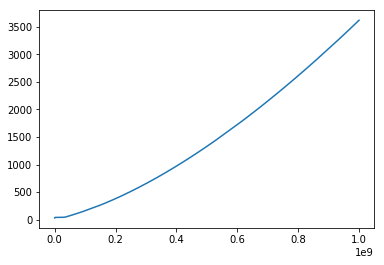

In [6]:
import matplotlib.pyplot as plt
lv = np.linspace(0, 1e8, 1000)
lbts = [elp_transfer(l)['dt'].days for l in lv] 
plt.plot(lv, lbts)
plt.show()

#path = elp_transfer(0.1*10e7)
#print(path['dt'].days)